# **About the company**

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. 

# **Business Task Summery**

The goal of this analysis is to understand how casual riders and annual members use Cyclistic bikes differently, to design a new marketing strategy to convert casual riders into annual members to increase companies growth.

# **Questions for Analysis**

1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships? 
3. How can Cyclistic use digital media to influence casual riders to become members? 

# **Data Source**

Last 12 month Cyclistic trip data from April 2022 to March 2023 was used for this analysis

In [1]:
# Loading Packages

library(tidyverse)
library(lubridate)
library(ggplot2)
library(dplyr)
library(readxl)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Importing Data

M202204<-read_excel("../input/cyclistic-trip-data/202204_tripdata.xlsx")
M202205<-read_excel("../input/cyclistic-trip-data/202205-tripdata.xlsx")
M202206<-read_excel("../input/cyclistic-trip-data/202206-tripdata.xlsx")
M202207<-read_excel("../input/cyclistic-trip-data/202207-tripdata.xlsx")
M202208<-read_excel("../input/cyclistic-trip-data/202208-tripdata.xlsx")
M202209<-read_excel("../input/cyclistic-trip-data/202209-tripdata.xlsx")
M202210<-read_excel("../input/cyclistic-trip-data/202210-tripdata.xlsx")
M202211<-read_excel("../input/cyclistic-trip-data/202211_tripdata.xlsx")
M202212<-read_excel("../input/cyclistic-trip-data/202212_tripdata.xlsx")
M202301<-read_excel("../input/cyclistic-trip-data/202301_tripdata.xlsx")
M202302<-read_excel("../input/cyclistic-trip-data/202302_tripdata.xlsx")
M202303<-read_excel("../input/cyclistic-trip-data/202303_tripdata.xlsx")

Warning message:
“Expecting date in E8002 / R8002C5: got '###############################################################################################################################################################################################################################################################'”
Warning message:
“Expecting date in E112544 / R112544C5: got '###############################################################################################################################################################################################################################################################'”
Warning message:
“Expecting date in E211334 / R211334C5: got '###############################################################################################################################################################################################################################################################'”
Warning message:
“Expecting date in E262294 

# **Wrangle Data and Combine into a Single File**

The Start station Id, End station Id, Start Station Latitude and Logitude and End station Latitude and Longitude columns and whitespace were removed from each file of the original data using spread sheet as those were not used for this analysis.
Ride length and day of the week columns were added and calculations were done for initial analysis of each file using spreadsheet

In [3]:
# Comparing column names of each file for consistency

colnames(M202204)
colnames(M202205)
colnames(M202206)
colnames(M202207)
colnames(M202208)
colnames(M202209)
colnames(M202210)
colnames(M202211)
colnames(M202212)
colnames(M202301)
colnames(M202302)
colnames(M202303)

[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "ride_length"        "day_of_the_week"   
[7] "start_station_name" "end_station_name"   "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "ride_length"        "day_of_the_week"   
[7] "start_station_name" "end_station_name"   "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "ride_length"        "day_of_the_week"   
[7] "start_station_name" "end_station_name"   "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "ride_length"        "day_of_the_week"   
[7] "start_station_name" "end_station_name"   "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "ride_length"        "day_of_the_week"   
[7] "start_station_name" "end_station_name"   "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "ride_length"        "day_of_the_week"   
[7] "start_station_name" "end_station_name"   "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "ride_length"        "day_of_the_week"   
[7] "start_station_name" "end_station_name"   "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "ride_length"        "day_of_the_week"   
[7] "start_station_name" "end_station_name"   "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "ride_length"        "day_of_the_week"   
[7] "start_station_name" "end_station_name"   "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "ride_length"        "day_of_the_week"   
[7] "start_station_name" "end_station_name"   "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "ride_length"        "day_of_the_week"   
[7] "start_station_name" "end_station_name"   "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "ride_length"        "day_of_the_week"   
[7] "start_station_name" "end_station_name"   "member_casual"

* All column names were found to be consistent

In [4]:
# Combining all the files into single file

all_trips <- bind_rows(M202204, M202205, M202206, M202207, M202208, M202209, M202210,M202211, M202212, M202301, M202302, M202303)

# **Preparing Data for Anlaysis**

In [5]:
# Inspect the new table that has been created
colnames(all_trips)  #List of column names
nrow(all_trips)  #How many rows are in data frame?
dim(all_trips)  #Dimensions of the data frame?
head(all_trips)  #See the first 6 rows of data frame.  Also tail(all_trips)
str(all_trips)  #See list of columns and data types (numeric, character, etc)
summary(all_trips)  #Statistical summary of data. Mainly for numerics



[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "ride_length"        "day_of_the_week"   
[7] "start_station_name" "end_station_name"   "member_casual"

[1] 5803720

[1] 5803720       9

ride_id,rideable_type,started_at,ended_at,ride_length,day_of_the_week,start_station_name,end_station_name,member_casual
<chr>,<chr>,<dttm>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<chr>
3564070EEFD12711,electric_bike,2022-04-06 17:42:48,2022-04-06 17:54:36,1899-12-31 00:11:48,4,Paulina St & Howard St,University Library (NU),member
0B820C7FCF22F489,classic_bike,2022-04-24 19:23:07,2022-04-24 19:43:17,1899-12-31 00:20:10,1,Wentworth Ave & Cermak Rd,Green St & Madison St,member
89EEEE32293F07FF,classic_bike,2022-04-20 19:29:08,2022-04-20 19:35:16,1899-12-31 00:06:08,4,Halsted St & Polk St,Green St & Madison St,member
84D4751AEB31888D,classic_bike,2022-04-22 21:14:06,2022-04-22 21:23:29,1899-12-31 00:09:23,6,Wentworth Ave & Cermak Rd,Delano Ct & Roosevelt Rd,casual
5664BCF0D1DE7A8B,electric_bike,2022-04-16 15:56:30,2022-04-16 16:02:11,1899-12-31 00:05:41,7,Halsted St & Polk St,Clinton St & Madison St,member
AA9EB7BD2E1FC128,classic_bike,2022-04-21 16:52:33,2022-04-21 16:56:51,1899-12-31 00:04:18,5,Desplaines St & Randolph St,Canal St & Adams St,member


tibble [5,803,720 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5803720] "3564070EEFD12711" "0B820C7FCF22F489" "89EEEE32293F07FF" "84D4751AEB31888D" ...
 $ rideable_type     : chr [1:5803720] "electric_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:5803720], format: "2022-04-06 17:42:48" "2022-04-24 19:23:07" ...
 $ ended_at          : POSIXct[1:5803720], format: "2022-04-06 17:54:36" "2022-04-24 19:43:17" ...
 $ ride_length       : POSIXct[1:5803720], format: "1899-12-31 00:11:48" "1899-12-31 00:20:10" ...
 $ day_of_the_week   : num [1:5803720] 4 1 4 6 7 5 2 3 6 6 ...
 $ start_station_name: chr [1:5803720] "Paulina St & Howard St" "Wentworth Ave & Cermak Rd" "Halsted St & Polk St" "Wentworth Ave & Cermak Rd" ...
 $ end_station_name  : chr [1:5803720] "University Library (NU)" "Green St & Madison St" "Green St & Madison St" "Delano Ct & Roosevelt Rd" ...
 $ member_casual     : chr [1:5803720] "member" "member" "member" "casual" 

   ride_id          rideable_type        started_at                 
 Length:5803720     Length:5803720     Min.   :2022-04-01 00:01:48  
 Class :character   Class :character   1st Qu.:2022-06-18 23:27:00  
 Mode  :character   Mode  :character   Median :2022-08-13 11:37:00  
                                       Mean   :2022-08-25 07:04:51  
                                       3rd Qu.:2022-10-14 18:04:21  
                                       Max.   :2023-03-31 23:59:28  
                                                                    
    ended_at                    ride_length                  day_of_the_week
 Min.   :2022-04-01 00:02:15   Min.   :1899-12-30 21:11:18   Min.   :1.000  
 1st Qu.:2022-06-18 23:51:55   1st Qu.:1899-12-31 00:05:41   1st Qu.:2.000  
 Median :2022-08-13 12:00:00   Median :1899-12-31 00:10:02   Median :4.000  
 Mean   :2022-08-25 07:23:50   Mean   :1899-12-31 00:18:58   Mean   :4.103  
 3rd Qu.:2022-10-14 18:19:10   3rd Qu.:1899-12-31 00:18:01   3r

* Adding Date, Day, Month, Year columns of the ride to the file for detailed analysis

In [6]:
all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
str(all_trips)

tibble [5,803,720 × 13] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5803720] "3564070EEFD12711" "0B820C7FCF22F489" "89EEEE32293F07FF" "84D4751AEB31888D" ...
 $ rideable_type     : chr [1:5803720] "electric_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:5803720], format: "2022-04-06 17:42:48" "2022-04-24 19:23:07" ...
 $ ended_at          : POSIXct[1:5803720], format: "2022-04-06 17:54:36" "2022-04-24 19:43:17" ...
 $ ride_length       : POSIXct[1:5803720], format: "1899-12-31 00:11:48" "1899-12-31 00:20:10" ...
 $ day_of_the_week   : num [1:5803720] 4 1 4 6 7 5 2 3 6 6 ...
 $ start_station_name: chr [1:5803720] "Paulina St & Howard St" "Wentworth Ave & Cermak Rd" "Halsted St & Polk St" "Wentworth Ave & Cermak Rd" ...
 $ end_station_name  : chr [1:5803720] "University Library (NU)" "Green St & Madison St" "Green St & Madison St" "Delano Ct & Roosevelt Rd" ...
 $ member_casual     : chr [1:5803720] "member" "member" "member" "casual"

* Adding Hour, Minutes and Seconds columns of the ride.

In [7]:

all_trips$Time <- as.POSIXct(all_trips$started_at)
all_trips$Hours <- format(as.POSIXct(all_trips$Time), "%H")
all_trips$Minutes <- format(as.POSIXct(all_trips$Time), "%M") 
str(all_trips)

tibble [5,803,720 × 16] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5803720] "3564070EEFD12711" "0B820C7FCF22F489" "89EEEE32293F07FF" "84D4751AEB31888D" ...
 $ rideable_type     : chr [1:5803720] "electric_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:5803720], format: "2022-04-06 17:42:48" "2022-04-24 19:23:07" ...
 $ ended_at          : POSIXct[1:5803720], format: "2022-04-06 17:54:36" "2022-04-24 19:43:17" ...
 $ ride_length       : POSIXct[1:5803720], format: "1899-12-31 00:11:48" "1899-12-31 00:20:10" ...
 $ day_of_the_week   : num [1:5803720] 4 1 4 6 7 5 2 3 6 6 ...
 $ start_station_name: chr [1:5803720] "Paulina St & Howard St" "Wentworth Ave & Cermak Rd" "Halsted St & Polk St" "Wentworth Ave & Cermak Rd" ...
 $ end_station_name  : chr [1:5803720] "University Library (NU)" "Green St & Madison St" "Green St & Madison St" "Delano Ct & Roosevelt Rd" ...
 $ member_casual     : chr [1:5803720] "member" "member" "member" "casual"

* Adding ride length column to calculate the length of each ride in seconds.
* Adding a day of the week column.

In [8]:
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")
str(all_trips)

tibble [5,803,720 × 17] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5803720] "3564070EEFD12711" "0B820C7FCF22F489" "89EEEE32293F07FF" "84D4751AEB31888D" ...
 $ rideable_type     : chr [1:5803720] "electric_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:5803720], format: "2022-04-06 17:42:48" "2022-04-24 19:23:07" ...
 $ ended_at          : POSIXct[1:5803720], format: "2022-04-06 17:54:36" "2022-04-24 19:43:17" ...
 $ ride_length       : 'difftime' num [1:5803720] 708 1210 368 563 ...
  ..- attr(*, "units")= chr "secs"
 $ day_of_the_week   : num [1:5803720] 4 1 4 6 7 5 2 3 6 6 ...
 $ start_station_name: chr [1:5803720] "Paulina St & Howard St" "Wentworth Ave & Cermak Rd" "Halsted St & Polk St" "Wentworth Ave & Cermak Rd" ...
 $ end_station_name  : chr [1:5803720] "University Library (NU)" "Green St & Madison St" "Green St & Madison St" "Delano Ct & Roosevelt Rd" ...
 $ member_casual     : chr [1:5803720] "member" "member" "member" "

* Remvoing the entries in the data frame were the ride length are negative
* Fixing the order of the day of the week column

In [9]:
all_trips_v2 <- all_trips[!(all_trips$ride_length<0),]
all_trips$day_of_week <- ordered(all_trips$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))


In [10]:
# Convert "ride_length" from Factor to numeric so we can run calculations on the data
is.factor(all_trips_v2$ride_length)
all_trips_v2$ride_length <- as.numeric(as.character(all_trips_v2$ride_length))
is.numeric(all_trips_v2$ride_length)


[1] FALSE

[1] TRUE

# **Data Analysis**

In [11]:
# Ride length summery
summary(all_trips_v2$ride_length)

# Compare members and casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

# See the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

# Now, let's run the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     342     600    1139    1080 2483235 

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1716.1474
member,749.6492


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,761
member,522


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,2483235
member,93580


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,0
member,0


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,1662.0162
member,Friday,739.8502
casual,Monday,1707.5969
member,Monday,720.9854
casual,Saturday,1939.7328
member,Saturday,838.0433
casual,Sunday,2012.3142
member,Sunday,830.0163
casual,Thursday,1489.4543


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,1662.0162
member,Friday,739.8502
casual,Monday,1707.5969
member,Monday,720.9854
casual,Saturday,1939.7328
member,Saturday,838.0433
casual,Sunday,2012.3142
member,Sunday,830.0163
casual,Thursday,1489.4543


# **Visualization**

## Visualizing number of rides in last 12 months

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


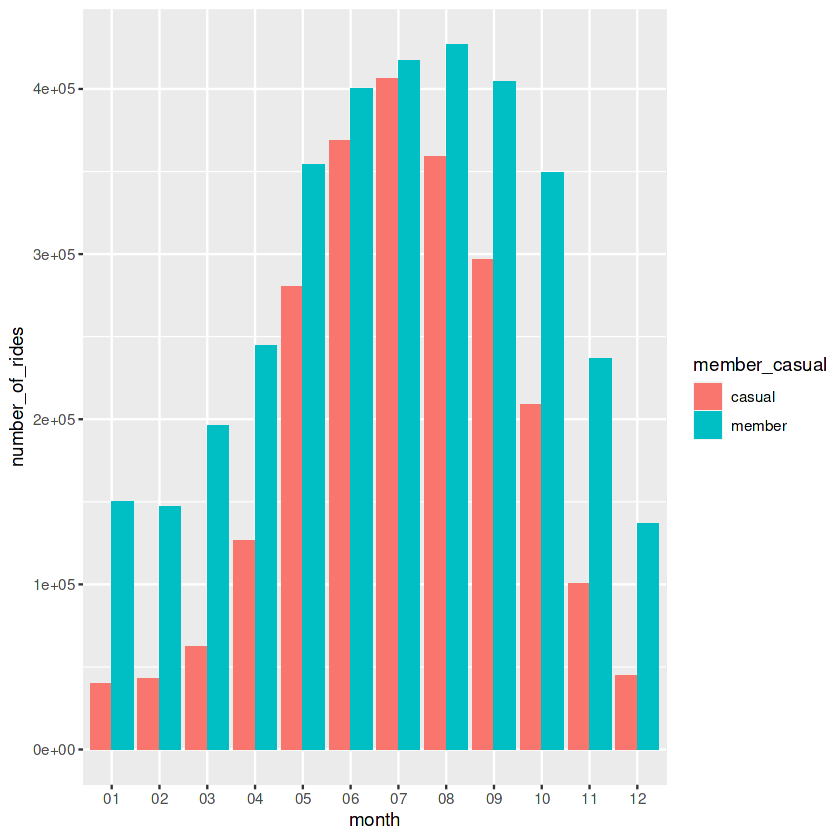

In [12]:
all_trips_v2 %>% # Monthy total rides
  group_by(month, member_casual) %>% summarise(number_of_rides=n())%>%
  ggplot(aes(x=month, y=number_of_rides, fill=member_casual))+ geom_col(position = "dodge")

* Number of rides for both members and casual customers sees a drastic rise in the summer season month of June, July, and August.

##  Visualizing average ride length in last 12 months

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


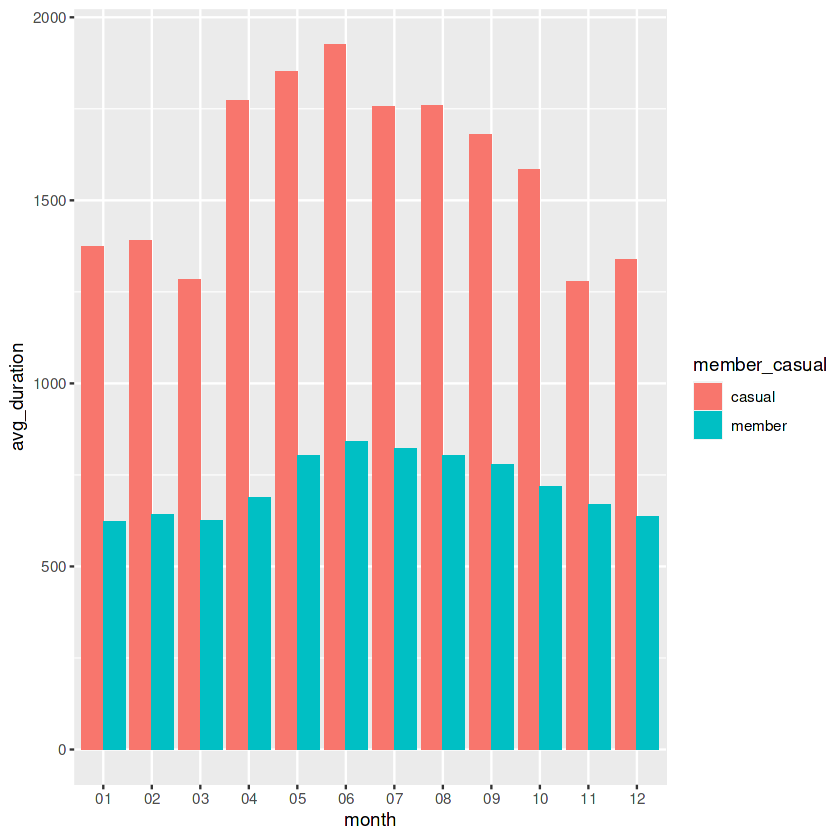

In [13]:
all_trips_v2 %>% # Monthly Avg ride length
  group_by(month, member_casual) %>% summarise(avg_duration=mean(ride_length))%>%
  ggplot(aes(x=month, y=avg_duration, fill=member_casual))+ geom_col(position = "dodge")

* Ride length for the members remains consistent throughout the year with a slight rise in summer season.
* The ride length for the casual riders are much greater then members and peaks in the month of June.

## Visualizing total rides in each day of the week in last 12 months

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


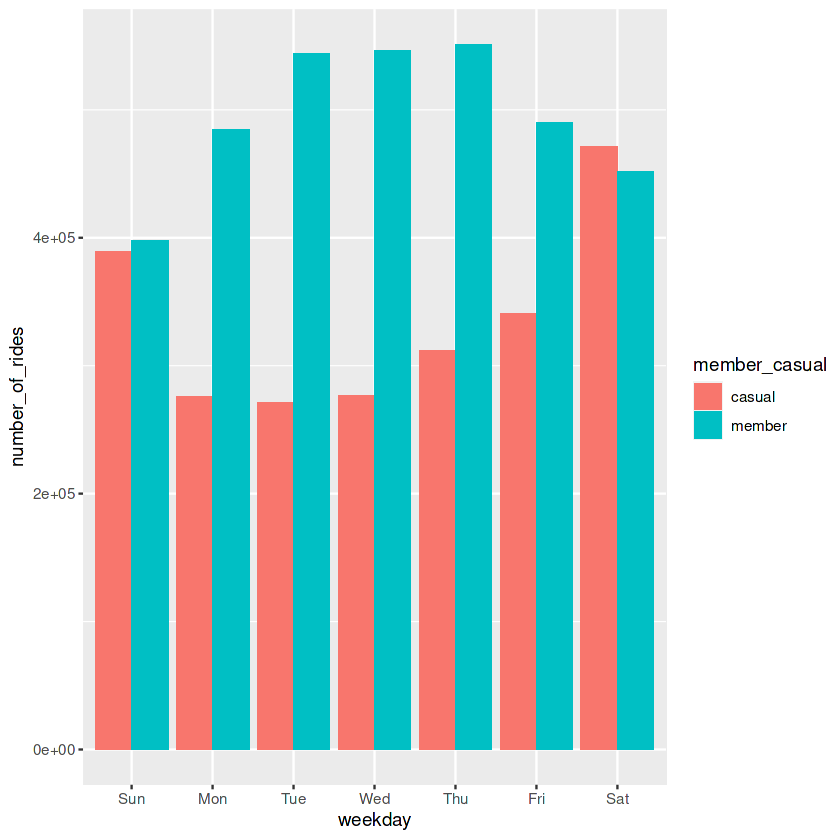

In [14]:
all_trips %>% # 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")


* Most number of rides for members are on weekdays.
* Most number of rides for casual riders are on weekends.

## Visualizing avergae ride length in each day of the week in last 12 months

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


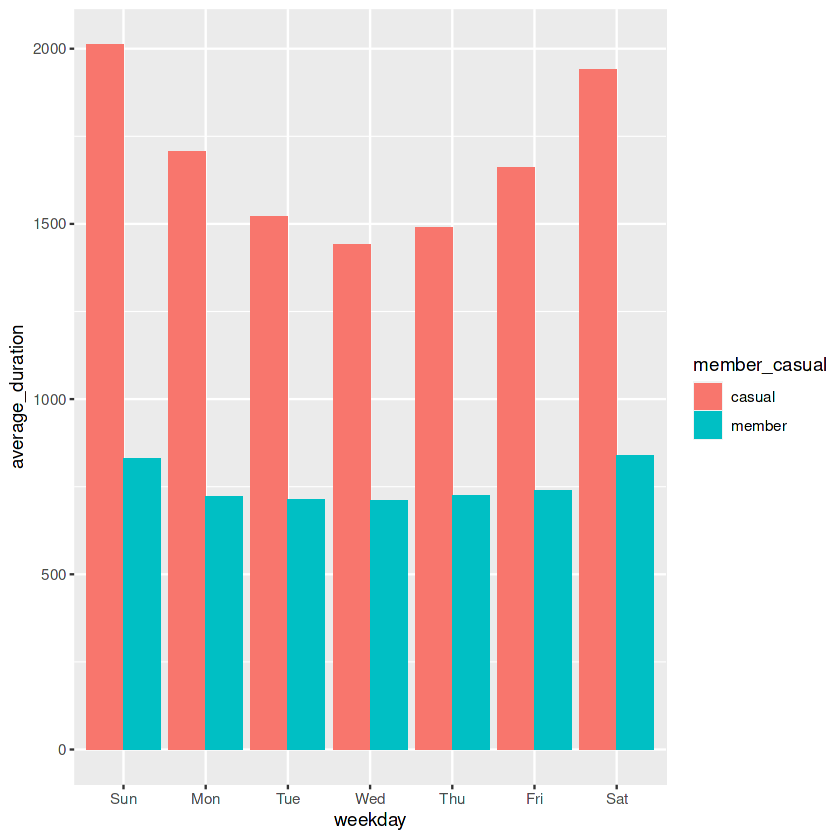

In [15]:
all_trips_v2 %>% # Avg weekly ride length
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")

* The average ride length of the members are consistent throughout the week.
* The average ride length of the casual rides peaks on weekends  and much greater then members throughout the week.

## Visualizing total rides in each hour of the day in last 12 month

`summarise()` has grouped output by 'Hours'. You can override using the
`.groups` argument.


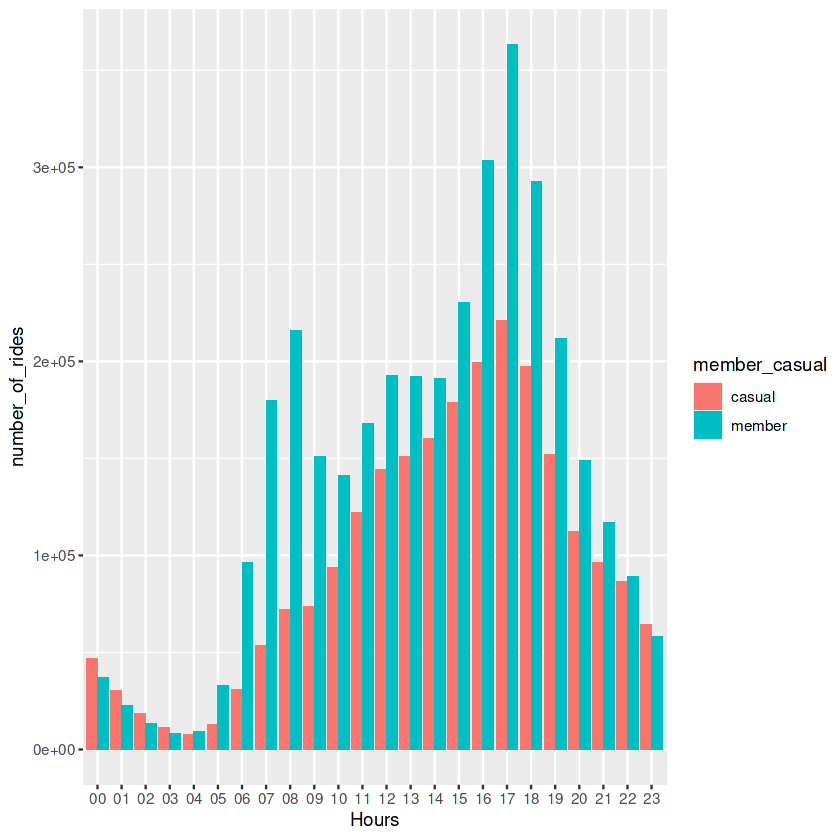

In [16]:
all_trips_v2 %>% # Total hourly rides 
  group_by(Hours, member_casual) %>% summarise(number_of_rides= n())%>%
  ggplot(aes(x=Hours, y=number_of_rides, fill=member_casual, angle=90))+ geom_col(position = "dodge")

* The total rides count for both members and casual riders peaks in evening from 4 PM to 6 PM.

# **Recommendations**

Here are few recommendations to increase companies annaul membership count based on above data analysis

* Total ride count and average ride length for casual riders peaks in the summer month therefore introducing special summer season features and benifits with annual membership will increase conversion rate.
* According to the above analysis casual riders prefer weekends more as compared to weekdays for the rides hence annaul membership with weekend discount and benifits will help increase conversion rate.
* Casual riders book more rides between evening 4PM and 6PM most probably after work outing/Excersise hence annual members evening benifits like special gym membership discount, restaurant discounts etc by collaborating with local businesses will help increase annaual membership